### 二、冲激响应

冲激响应是由单位冲激函数 $\delta(t)$ 所引起的零状态响应，记作 $h(t)$

求取方法见 2.0 节的零状态响应

### 三、阶跃响应

阶跃响应是由单位阶跃函数 $u(t)$ 所引起的零状态响应，记作 $g(t)$

求取方法：
1. 同 冲激响应
1. 利用 LTI 系统的线性性质，因为 $u(t) = \int_{-\infty}^t \delta(t) \ dt$ 而且积分是线性变换，所以有 $g(t) = \int_{-\infty}^t h(t) \ dt$

### 四、LTI 系统特性与冲激响应 $h(t)$ 的关系

#### 1. 因果性

对因果系统而言，因为输入 $\delta(t)$ 是因果信号，所以响应 $h(t)$ 也一定是因果信号

#### 2. 稳定性

系统稳定的充要条件是：$\sum^{\infty}_{-\infty} |h(k)| < \infty$，证明：

![](system-steady.png)

### 3. 总结

![](LTI-system-features-h(t).png)

### 利用 julia 的 ControlSystems 模块求解 LTI 系统的 impluse response 和 step response

系统的微分方程形如 $$\sum_{i=1}^n a_i y^{(i)}(t) = \sum_{j=1}^m b_j f^{(j)}(t)$$

左边的系数构成矩阵 $A$，右边的系数构成矩阵 $B$

例：$7y''(t) + 4y'(t) + 6y(t) = f'(t) + f(t)$

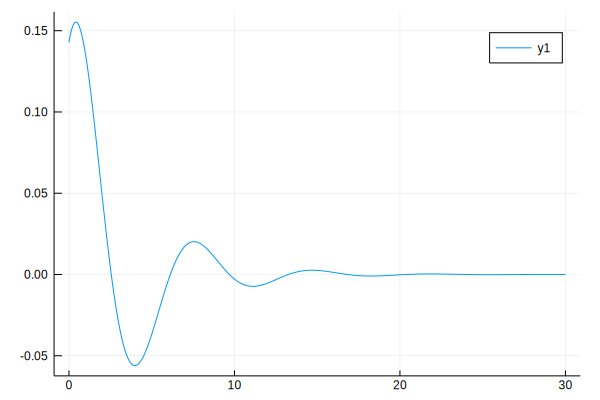

In [17]:
using Plots
using ControlSystems

# use GR as backend
gr()

# 1.1 微分方程中 y(t) 及其各阶导数的系数
A = [7; 4; 6]

# 1.2 微分方程中 f(t) 及其各际导数的系数L
B = [1; 1]

t = 0:0.01:30

# 1.4. 构建 LTI 系统模型，也称作传递函数（transfer function，详见 https://zh.wikipedia.org/wiki/传递函数）
sys = tf(B, A)  # 最后的零表示是连续系统，非离散。

# 求冲激响应
y, t, x = impulse(sys, t)

plot(t, y)

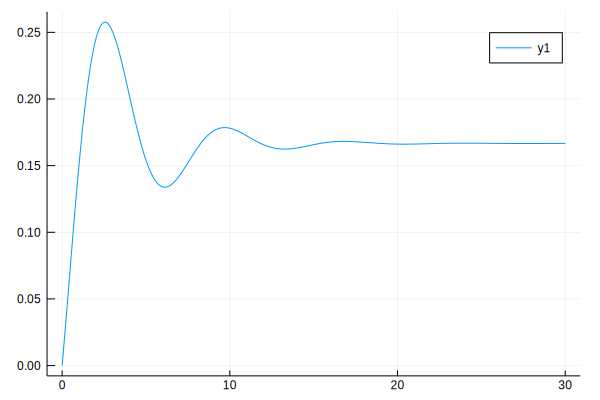

In [18]:
y, t, x = step(sys, t)

plot(t, y)

In [29]:
using Plots
gr()

# initialize the attractor
n = 1500
dt = 0.02
σ, ρ, β = 10., 28., 8/3
x, y, z = 1., 1., 1.

# initialize a 3D plot with 1 empty series
plt = path3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                xlab = "x", ylab = "y", zlab = "z",
                title = "Lorenz Attractor", marker = 1)

# build an animated gif, saving every 10th frame
@gif for i=1:n
    global x,y,z,σ
    dx = σ*(y - x)     ; x += dt * dx
    dy = x*(ρ - z) - y ; y += dt * dy
    dz = x*y - β*z     ; z += dt * dz
    push!(plt, x, y, z)
end every 10

┌ Info: Saved animation to 
│   fn = /home/ryan/jupyterlab/learning/signals and systems/tmp.gif
└ @ Plots /home/ryan/.julia/packages/Plots/y6yik/src/animation.jl:90


Plots.AnimatedGif("/home/ryan/jupyterlab/learning/signals and systems/tmp.gif")